<a href="https://colab.research.google.com/github/alecseiterr/Bridge-It/blob/main/Yumangulov_Ruslan/class12_NG_BridgeIT_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Обучение модели YOLO на классе дефектов 12_NG "наличие графити"


Загрузка архива с классом 12_NG из Яндекс_диска



In [1]:
import requests
import zipfile

# Задаем URL публичной ссылки и путь для сохранения
url = 'https://disk.yandex.ru/d/JWxFdKg2wX89JQ'
output = 'dataset.zip'

# Получение файла с Яндекс.Диска через прямую ссылку
def download_file_from_yandex_disk(public_link, destination):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?public_key='
    final_url = base_url + public_link
    response = requests.get(final_url)
    download_url = response.json()['href']
    download_response = requests.get(download_url, stream=True)

    with open(destination, 'wb') as f:
        for chunk in download_response.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)

# Загрузка архива
download_file_from_yandex_disk(url, output)

# Разархивирование
try:
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    print("Архив успешно разархивирован!")
except zipfile.BadZipFile:
    print("Ошибка: файл не является zip-архивом или поврежден.")


Архив успешно разархивирован!


In [2]:
import os

# Проверка содержимого папки
os.listdir('dataset')

# Проверяем содержимое папок с изображениями и метками
print("Файлы в папке images:", os.listdir('dataset/images'))
print("Файлы в папке labels:", os.listdir('dataset/labels'))


Файлы в папке images: ['202d4ebc-1900001-16-11.11.2017.jpg', '059b7798-2000806-1-10.08.2014.jpg', 'd7d3f3ff-2000803-1-10.08.2014.jpg', '4ffa221f-2303346-1-12.05.2020.jpg', '64016bea-2100085-29-17.05.2017.jpg', 'ec523773-1100124-8-27.02.2013.jpg', '748de5d0-2101834-4-20.06.2017.jpg', 'e6957652-2000833-4-22.08.2014.jpg', '49c1bff7-2300140-9-15.12.2017.jpg', '4d55b20b-2101827-6-18.06.2017.jpg', '42a5888e-1702577-1-24.07.2017.jpg', 'f8074616-1702578-63-21.07.20176.jpg', '0ce252cd-1900284-6-07.09.2017.jpg', '5d999602-1100031-25-08.03.2013.jpg', '379cec3f-2101828-1-04.06.2017.jpg', '4a714f75-1900090-37-21.11.2017.jpg', 'b7c89ffb-2000832-3-20.08.20142.jpg', '4aaccb31-1900281-1-17.10.20121.jpg', 'e62b83a4-1903632-7-11.09.2017.jpg', 'b26541e5-1700021-21-27.11.2017.jpg', 'd851e982-1900142-2-13.08.2015.jpg', 'e6975e74-2000041-32-29.11.2017.jpg', '89fbfbb9-2300160-39-03.12.2017.jpg', 'ba0decf1-1900061-31-26.06.2017.jpg', '646abd14-1702580-23-24.07.2017.jpg', 'd6a8761e-2101824-1-16.06.2017.jpg', 'b

Разделение датасета на обучающую и проверочную выборки

In [3]:
import glob
from sklearn.model_selection import train_test_split
import shutil
import os

# Пути к изображениям и аннотациям
images = glob.glob('dataset/images/*')
labels = glob.glob('dataset/labels/*')

# Убедимся, что изображения и аннотации соответствуют друг другу
images.sort()
labels.sort()

# Разделяем данные на обучающую и проверочную выборки (80% / 20%)
train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Создадим необходимые папки для разделенных данных
os.makedirs('dataset/train/images', exist_ok=True)
os.makedirs('dataset/train/labels', exist_ok=True)
os.makedirs('dataset/val/images', exist_ok=True)
os.makedirs('dataset/val/labels', exist_ok=True)

# Переносим файлы в соответствующие папки
for img, lbl in zip(train_images, train_labels):
    shutil.move(img, 'dataset/train/images/')
    shutil.move(lbl, 'dataset/train/labels/')

for img, lbl in zip(val_images, val_labels):
    shutil.move(img, 'dataset/val/images/')
    shutil.move(lbl, 'dataset/val/labels/')

# Выводим количество файлов в каждой папке для проверки
print("Количество обучающих изображений:", len(os.listdir('dataset/train/images')))
print("Количество обучающих меток:", len(os.listdir('dataset/train/labels')))
print("Количество проверочных изображений:", len(os.listdir('dataset/val/images')))
print("Количество проверочных меток:", len(os.listdir('dataset/val/labels')))


Количество обучающих изображений: 96
Количество обучающих меток: 96
Количество проверочных изображений: 25
Количество проверочных меток: 25


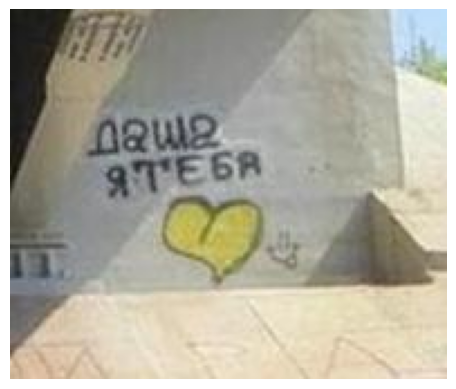

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

# Загрузка картинки
image_path = "/content/dataset/train/images/0409a60b-1100124-41-29.06.2016.jpg"
image = Image.open(image_path)

# Отображение картинки
plt.imshow(image)
plt.axis('off')  # Отключаем оси для красоты
plt.show()


In [5]:
import os
import yaml

# Пути к папкам с данными
train_images_path = 'dataset/train/images'
val_images_path = 'dataset/val/images'

# Проверяем наличие данных в указанных папках
print("Содержимое папки с обучающими изображениями:", os.listdir(train_images_path))
print("Содержимое папки с проверочными изображениями:", os.listdir(val_images_path))

# Проверяем наличие меток в указанных папках
train_labels_path = 'dataset/train/labels'
val_labels_path = 'dataset/val/labels'

print("Содержимое папки с обучающими метками:", os.listdir(train_labels_path))
print("Содержимое папки с проверочными метками:", os.listdir(val_labels_path))

# Создаем файл data.yaml с правильными путями
data_yaml = {
    'train': '/content/dataset/train/images',
    'val': '/content/dataset/val/images',
    'nc': len(open('/content/dataset/classes.txt').read().splitlines()),  # Количество классов
    'names': open('/content/dataset/classes.txt').read().splitlines()  # Имена классов
}

with open('data.yaml', 'w') as f:
    yaml.dump(data_yaml, f, default_flow_style=False)

print("Файл data.yaml создан")



Содержимое папки с обучающими изображениями: ['202d4ebc-1900001-16-11.11.2017.jpg', '059b7798-2000806-1-10.08.2014.jpg', 'd7d3f3ff-2000803-1-10.08.2014.jpg', '4ffa221f-2303346-1-12.05.2020.jpg', 'ec523773-1100124-8-27.02.2013.jpg', 'e6957652-2000833-4-22.08.2014.jpg', '49c1bff7-2300140-9-15.12.2017.jpg', '4d55b20b-2101827-6-18.06.2017.jpg', '42a5888e-1702577-1-24.07.2017.jpg', 'f8074616-1702578-63-21.07.20176.jpg', '0ce252cd-1900284-6-07.09.2017.jpg', '5d999602-1100031-25-08.03.2013.jpg', '379cec3f-2101828-1-04.06.2017.jpg', 'b7c89ffb-2000832-3-20.08.20142.jpg', '4aaccb31-1900281-1-17.10.20121.jpg', 'e62b83a4-1903632-7-11.09.2017.jpg', 'b26541e5-1700021-21-27.11.2017.jpg', 'd851e982-1900142-2-13.08.2015.jpg', 'e6975e74-2000041-32-29.11.2017.jpg', '89fbfbb9-2300160-39-03.12.2017.jpg', 'ba0decf1-1900061-31-26.06.2017.jpg', '646abd14-1702580-23-24.07.2017.jpg', 'd6a8761e-2101824-1-16.06.2017.jpg', 'bb4e2ef1-2302929-2-13.03.2013.jpg', 'c25d6feb-1900076-9-31.10.2012.jpg', 'a854c8d5-1700087-

In [6]:
!pip install ultralytics

from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.3/800.3 kB 6.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [7]:
# Загрузка модели
model = YOLO("yolov8n.pt")

# Запуск обучения
model.train(data='data.yaml', epochs=50, imgsz=640, batch=16, name='yolov8_custom')

# Оценка модели
metrics = model.val()


100%|██████████| 6.25M/6.25M [00:00<00:00, 130MB/s]


Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

100%|██████████| 755k/755k [00:00<00:00, 22.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 96 images, 0 backgrounds, 0 corrupt: 100%|██████████| 96/96 [00:00<00:00, 354.72it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/val/labels... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<00:00, 456.35it/s]

val: New cache created: /content/dataset/val/labels.cache


Plotting labels to runs/detect/yolov8_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/yolov8_custom
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.642      3.054      1.545        186        640: 100%|██████████| 6/6 [02:02<00:00, 20.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.48s/it]

                   all         25        133     0.0144      0.812      0.179      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.518      2.553      1.421        139        640: 100%|██████████| 6/6 [01:32<00:00, 15.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.65s/it]

                   all         25        133     0.0164      0.925       0.32      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.431      1.932      1.342        105        640: 100%|██████████| 6/6 [01:36<00:00, 16.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.12s/it]

                   all         25        133      0.805      0.124      0.346      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.372      1.721      1.293        133        640: 100%|██████████| 6/6 [01:32<00:00, 15.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.37s/it]

                   all         25        133      0.829      0.183      0.398      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.308      1.642      1.306        143        640: 100%|██████████| 6/6 [01:31<00:00, 15.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.65s/it]

                   all         25        133      0.717      0.241      0.377      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.302      1.611      1.249        118        640: 100%|██████████| 6/6 [01:33<00:00, 15.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.77s/it]

                   all         25        133      0.446      0.279      0.319      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.324      1.531      1.275        155        640: 100%|██████████| 6/6 [01:32<00:00, 15.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.65s/it]

                   all         25        133      0.434      0.368      0.335      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.335      1.511      1.286        167        640: 100%|██████████| 6/6 [01:31<00:00, 15.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.05s/it]

                   all         25        133       0.51      0.323      0.333      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.309      1.536      1.276        108        640: 100%|██████████| 6/6 [01:37<00:00, 16.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.45s/it]

                   all         25        133      0.507      0.331      0.338      0.183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.354      1.456      1.273        168        640: 100%|██████████| 6/6 [01:32<00:00, 15.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.91s/it]

                   all         25        133      0.441      0.353      0.314      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.287       1.39      1.252        130        640: 100%|██████████| 6/6 [01:32<00:00, 15.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.81s/it]

                   all         25        133       0.56      0.383      0.419      0.204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.255      1.313       1.22        163        640: 100%|██████████| 6/6 [01:36<00:00, 16.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.02s/it]

                   all         25        133      0.492      0.371      0.367      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.249      1.348      1.258        147        640: 100%|██████████| 6/6 [01:32<00:00, 15.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.38s/it]

                   all         25        133      0.506      0.316      0.339      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.284      1.327      1.221        114        640: 100%|██████████| 6/6 [01:32<00:00, 15.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.72s/it]

                   all         25        133      0.443      0.301      0.262      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G       1.25       1.29      1.196        197        640: 100%|██████████| 6/6 [01:37<00:00, 16.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.17s/it]

                   all         25        133      0.315      0.259      0.179     0.0836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.252      1.275      1.221        117        640: 100%|██████████| 6/6 [01:31<00:00, 15.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.08s/it]

                   all         25        133      0.352      0.226      0.182     0.0835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.274      1.267      1.249        139        640: 100%|██████████| 6/6 [01:30<00:00, 15.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.73s/it]

                   all         25        133       0.51      0.226      0.216      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G      1.259      1.238      1.238        158        640: 100%|██████████| 6/6 [01:34<00:00, 15.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.30s/it]

                   all         25        133      0.348      0.263      0.181     0.0824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.242      1.174      1.193        178        640: 100%|██████████| 6/6 [01:33<00:00, 15.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.35s/it]

                   all         25        133      0.314      0.286      0.167     0.0696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.229      1.229      1.217        165        640: 100%|██████████| 6/6 [01:33<00:00, 15.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.05s/it]

                   all         25        133      0.349      0.406      0.257      0.112



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.212      1.163      1.202         94        640: 100%|██████████| 6/6 [01:38<00:00, 16.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.97s/it]

                   all         25        133      0.408      0.368      0.315      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.193      1.099      1.165        144        640: 100%|██████████| 6/6 [01:33<00:00, 15.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.09s/it]

                   all         25        133      0.491      0.353      0.343      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.184      1.081      1.182        118        640: 100%|██████████| 6/6 [01:32<00:00, 15.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.93s/it]

                   all         25        133      0.405      0.391      0.314      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.224       1.12        1.2        155        640: 100%|██████████| 6/6 [01:29<00:00, 14.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.50s/it]

                   all         25        133       0.48      0.376      0.316      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.155      1.106      1.184        164        640: 100%|██████████| 6/6 [01:31<00:00, 15.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.64s/it]

                   all         25        133      0.514      0.316       0.32      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.173        1.1      1.206        173        640: 100%|██████████| 6/6 [01:30<00:00, 15.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.47s/it]

                   all         25        133      0.526      0.391      0.391      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G      1.157      1.058      1.161        133        640: 100%|██████████| 6/6 [01:28<00:00, 14.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.53s/it]

                   all         25        133      0.587      0.361      0.423      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.139      1.026       1.16        124        640: 100%|██████████| 6/6 [01:30<00:00, 15.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.71s/it]

                   all         25        133      0.721      0.331      0.433      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G      1.141     0.9728      1.148        196        640: 100%|██████████| 6/6 [01:31<00:00, 15.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.61s/it]

                   all         25        133      0.512      0.371      0.379      0.205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G      1.117     0.9874      1.141        176        640: 100%|██████████| 6/6 [01:29<00:00, 15.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.88s/it]

                   all         25        133      0.516      0.376      0.391      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G      1.068     0.9041       1.11        133        640: 100%|██████████| 6/6 [01:30<00:00, 15.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.17s/it]

                   all         25        133      0.617      0.391      0.427      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.137     0.9484      1.132        196        640: 100%|██████████| 6/6 [01:31<00:00, 15.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.54s/it]

                   all         25        133       0.66      0.391      0.432      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G      1.059     0.9052      1.083        220        640: 100%|██████████| 6/6 [01:28<00:00, 14.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.98s/it]

                   all         25        133       0.63      0.346      0.421      0.214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.067     0.9515      1.114        123        640: 100%|██████████| 6/6 [01:31<00:00, 15.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.84s/it]

                   all         25        133      0.462      0.376      0.357      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.094     0.9281      1.119        126        640: 100%|██████████| 6/6 [01:33<00:00, 15.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.60s/it]

                   all         25        133      0.493      0.315      0.311      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.017     0.8358      1.073        142        640: 100%|██████████| 6/6 [01:30<00:00, 15.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.90s/it]

                   all         25        133      0.534      0.241      0.303      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G       1.02     0.8842      1.091        162        640: 100%|██████████| 6/6 [01:31<00:00, 15.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:11<00:00, 11.56s/it]

                   all         25        133      0.544      0.242      0.307      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      0.958      0.823      1.077        117        640: 100%|██████████| 6/6 [01:33<00:00, 15.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.72s/it]

                   all         25        133      0.407      0.301      0.304      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.035     0.8843       1.12        107        640: 100%|██████████| 6/6 [01:32<00:00, 15.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.26s/it]

                   all         25        133      0.392      0.346      0.299      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G     0.9668     0.8254       1.06        173        640: 100%|██████████| 6/6 [01:32<00:00, 15.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.84s/it]

                   all         25        133      0.579      0.338      0.337      0.181


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G     0.9551      1.012      1.085         78        640: 100%|██████████| 6/6 [01:32<00:00, 15.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.38s/it]

                   all         25        133      0.503      0.338      0.324      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G     0.9488     0.9253      1.067         64        640: 100%|██████████| 6/6 [01:30<00:00, 15.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.97s/it]

                   all         25        133      0.515      0.323      0.311      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G     0.9276     0.9043      1.022         79        640: 100%|██████████| 6/6 [01:29<00:00, 14.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.24s/it]

                   all         25        133      0.468      0.353      0.316      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G     0.9105     0.8964      1.034         64        640: 100%|██████████| 6/6 [01:29<00:00, 14.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.78s/it]

                   all         25        133      0.555      0.361       0.36      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G     0.9368     0.8226      1.038         92        640: 100%|██████████| 6/6 [01:28<00:00, 14.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.54s/it]

                   all         25        133      0.528      0.391      0.361      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G     0.8676     0.7858      1.006         80        640: 100%|██████████| 6/6 [01:28<00:00, 14.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.97s/it]

                   all         25        133      0.538      0.398      0.379      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G     0.8794     0.7967      1.017         76        640: 100%|██████████| 6/6 [01:30<00:00, 15.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.55s/it]

                   all         25        133      0.535      0.398      0.381      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G     0.8698     0.7755     0.9946         98        640: 100%|██████████| 6/6 [01:28<00:00, 14.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.32s/it]

                   all         25        133       0.58      0.383      0.396      0.208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      0.831     0.7362      1.012         61        640: 100%|██████████| 6/6 [01:31<00:00, 15.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:10<00:00, 10.80s/it]

                   all         25        133      0.595      0.391      0.404       0.21



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G     0.8095     0.7595     0.9861         66        640: 100%|██████████| 6/6 [01:29<00:00, 14.85s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.63s/it]

                   all         25        133       0.54      0.432      0.414      0.221



50 epochs completed in 1.437 hours.
Optimizer stripped from runs/detect/yolov8_custom/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_custom/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_custom/weights/best.pt...
Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.91s/it]


                   all         25        133       0.54      0.433      0.414      0.221
Speed: 5.0ms preprocess, 324.7ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to runs/detect/yolov8_custom
Ultralytics YOLOv8.2.56 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/val/labels.cache... 25 images, 0 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:07<00:00,  3.90s/it]


                   all         25        133      0.498      0.406      0.405      0.216
Speed: 2.6ms preprocess, 275.2ms inference, 0.0ms loss, 5.8ms postprocess per image
Results saved to runs/detect/yolov8_custom2


In [8]:
# Сохранение обученной модели
from google.colab import drive
drive.mount('/content/drive')

# Сохранение обученной модели
model.save("/content/drive/MyDrive/yolov8_trained_12_NG.pt")


# model.save("https://drive.google.com/drive/folders/1c4h7rtzjRT4NRB-8OgzBQKmDlIPYdCqd?usp=drive_link/yolov8_trained_12_NG.pt")


Mounted at /content/drive


Загрузка тестовых изображений

In [11]:
# Задаем URL публичной ссылки и путь для сохранения
url = 'https://disk.yandex.ru/d/k1KplBL1cBhfXQ'
output = 'test.zip'

# Получение файла с Яндекс.Диска через прямую ссылку
def download_file_from_yandex_disk(public_link, destination):
    base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?public_key='
    final_url = base_url + public_link
    response = requests.get(final_url)
    download_url = response.json()['href']
    download_response = requests.get(download_url, stream=True)

    with open(destination, 'wb') as f:
        for chunk in download_response.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)

# Загрузка архива
download_file_from_yandex_disk(url, output)

# Разархивирование
try:
    with zipfile.ZipFile(output, 'r') as zip_ref:
        zip_ref.extractall('dataset')
    print("Архив успешно разархивирован!")
except zipfile.BadZipFile:
    print("Ошибка: файл не является zip-архивом или поврежден.")


Архив успешно разархивирован!


Тестирование модели.


image 1/1 /content/dataset/Test_img_class12_NG/1900023-9-2013-6-11.jpg: 480x640 12 12s, 712.6ms
Speed: 13.0ms preprocess, 712.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/yolov8_custom4


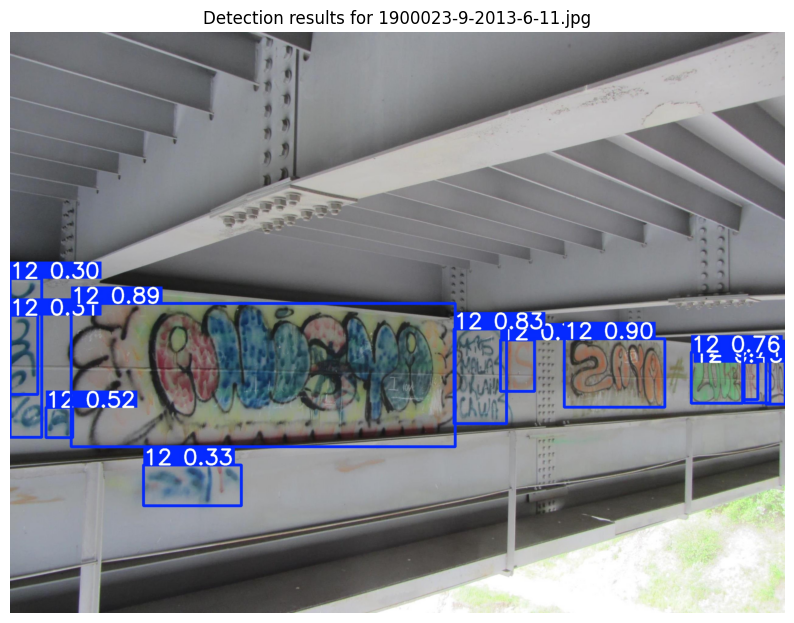


image 1/1 /content/dataset/Test_img_class12_NG/1803379-1-2017-9-17.jpg: 480x640 4 12s, 309.3ms
Speed: 5.9ms preprocess, 309.3ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/yolov8_custom5


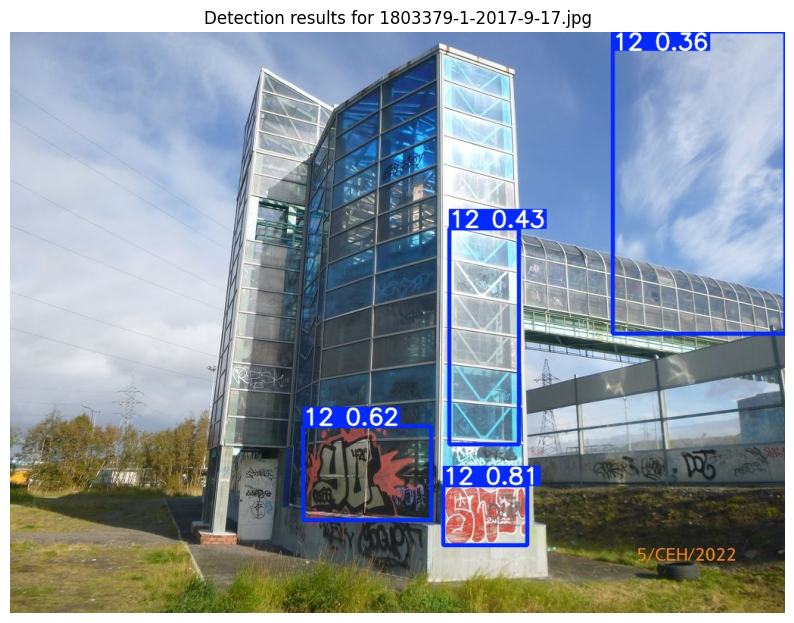


image 1/1 /content/dataset/Test_img_class12_NG/1900001-16-2017-11-11.jpg: 480x640 9 12s, 330.5ms
Speed: 5.7ms preprocess, 330.5ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/yolov8_custom6


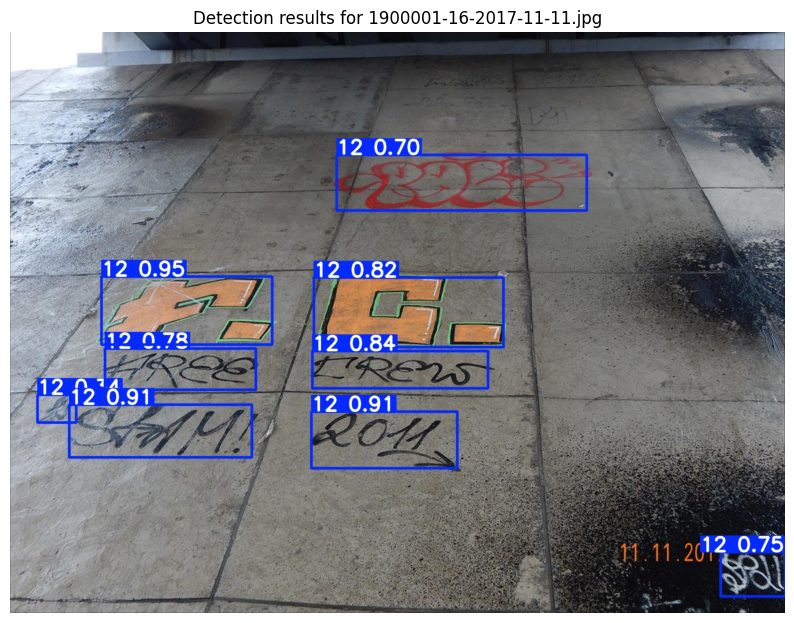


image 1/1 /content/dataset/Test_img_class12_NG/1900014-73-2022-8-21.jpg: 480x640 4 12s, 610.1ms
Speed: 13.2ms preprocess, 610.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/yolov8_custom7


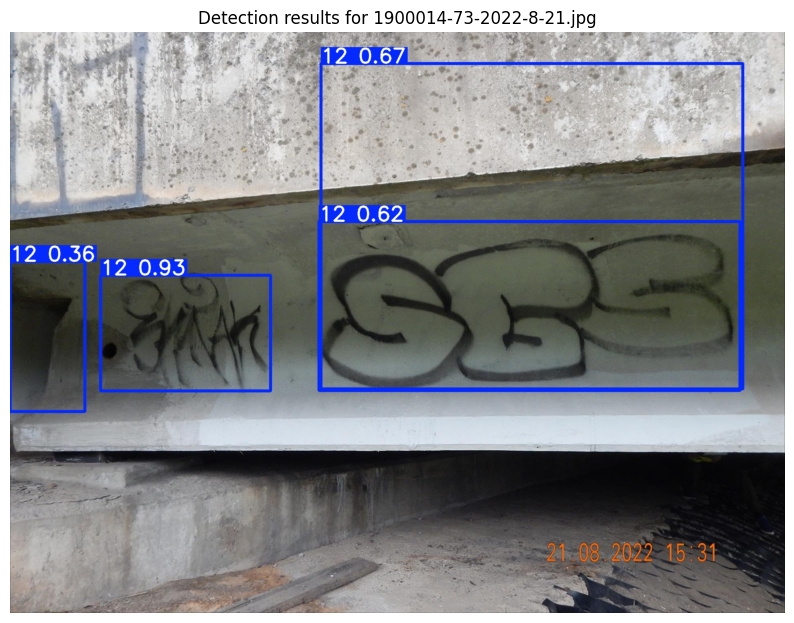


image 1/1 /content/dataset/Test_img_class12_NG/1900025-27-2018-7-6.jpg: 448x640 1 12, 364.1ms
Speed: 6.0ms preprocess, 364.1ms inference, 5.8ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/yolov8_custom8


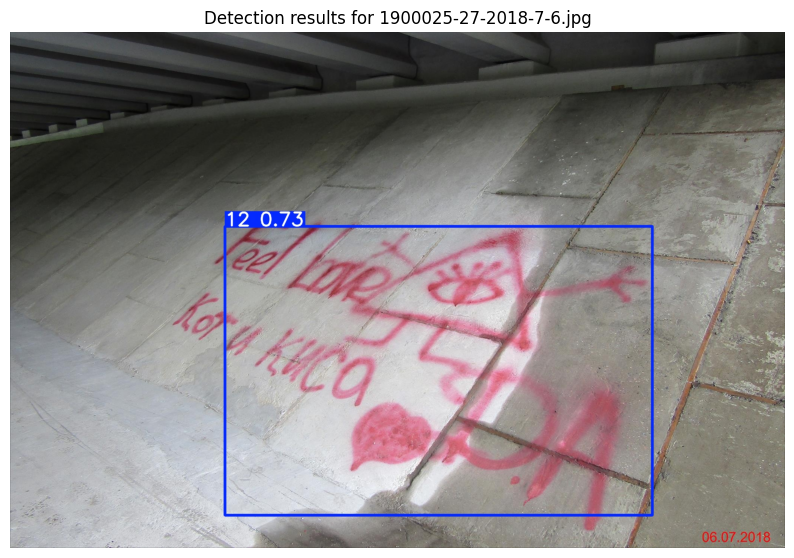


image 1/1 /content/dataset/Test_img_class12_NG/304370-47-2020-6-16.jpg: 480x640 3 12s, 281.7ms
Speed: 5.9ms preprocess, 281.7ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/yolov8_custom9


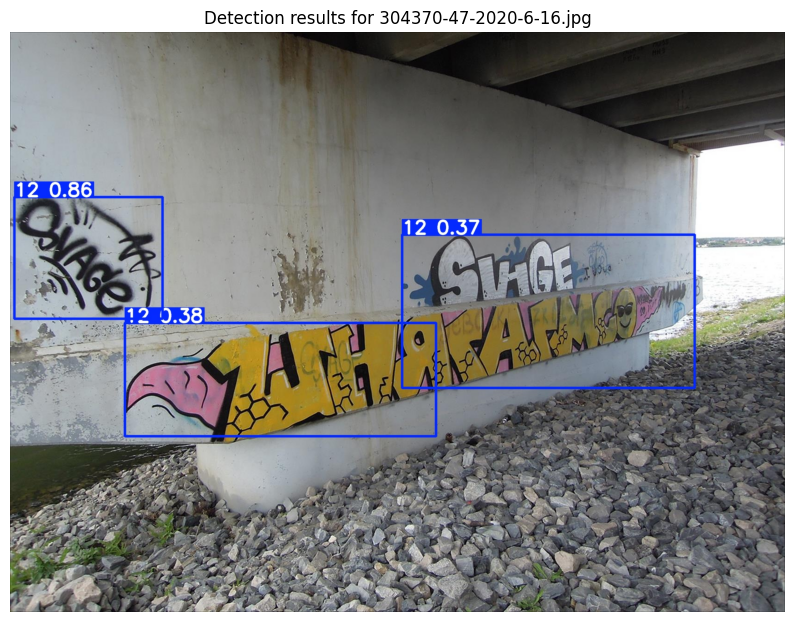


image 1/1 /content/dataset/Test_img_class12_NG/1900038-35-2022-9-11.jpg: 448x640 6 12s, 260.0ms
Speed: 5.5ms preprocess, 260.0ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/yolov8_custom10


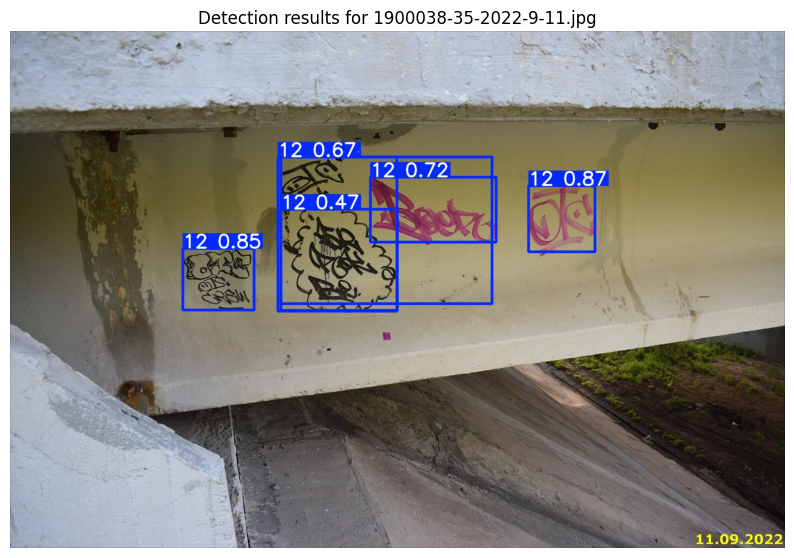


image 1/1 /content/dataset/Test_img_class12_NG/1100031-25-2013-3-8.jpg: 480x640 4 12s, 284.5ms
Speed: 6.3ms preprocess, 284.5ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/yolov8_custom11


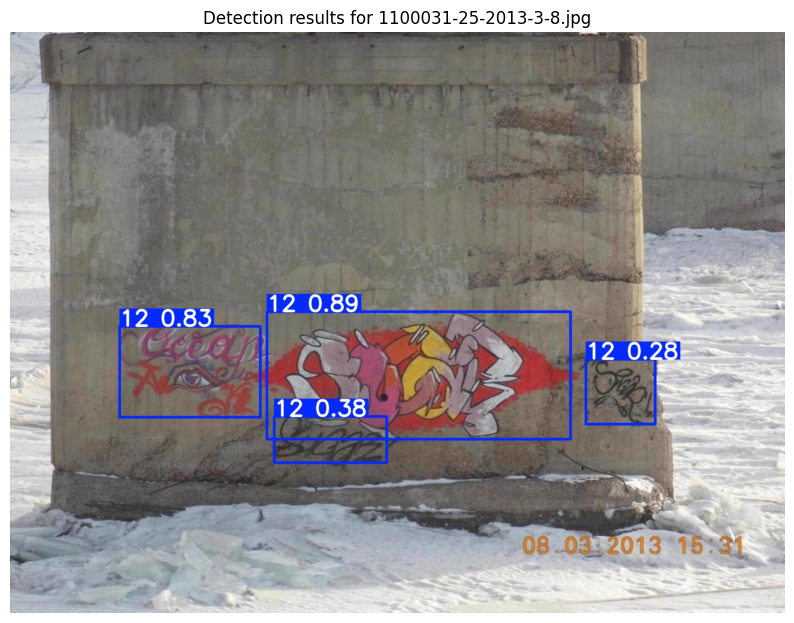


image 1/1 /content/dataset/Test_img_class12_NG/1900036-1-2012-9-22.jpg: 480x640 5 12s, 265.0ms
Speed: 7.5ms preprocess, 265.0ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/yolov8_custom12


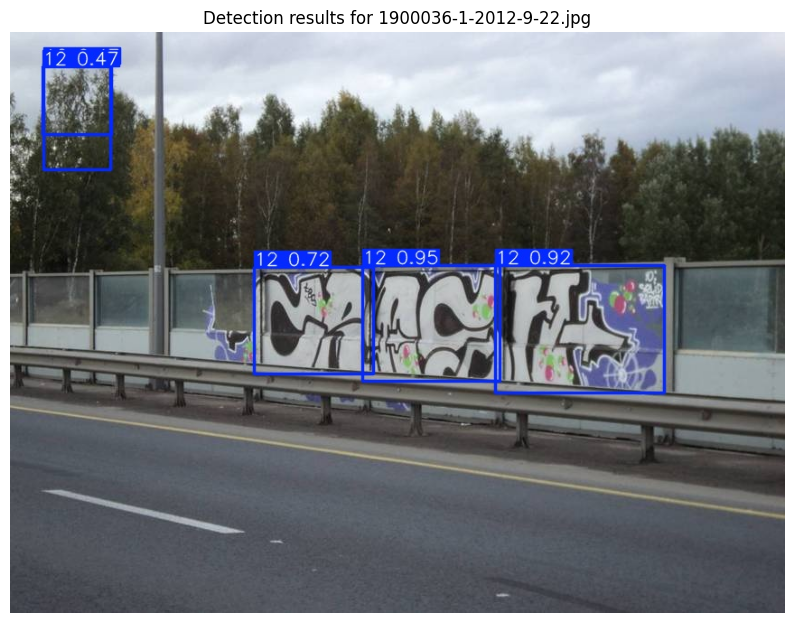

In [13]:
from pathlib import Path
import cv2

# Путь к папке с тестовыми изображениями
test_images_path = '/content/dataset/Test_img_class12_NG'

# Папка для сохранения результатов
output_folder = 'runs/detect/yolov8_test_results'
os.makedirs(output_folder, exist_ok=True)

# Выполнение предсказания на каждом изображении
for image_name in os.listdir(test_images_path):
    image_path = os.path.join(test_images_path, image_name)
    results = model.predict(source=image_path, save=True, save_dir=output_folder)

    # Отображение изображения с результатами
    result_image_path = Path(results[0].save_dir) / Path(results[0].path).name
    result_image = cv2.imread(str(result_image_path))
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(result_image)
    plt.title(f"Detection results for {image_name}")
    plt.axis('off')
    plt.show()